# Demo Solo

## Since some code executed by PyCharm, I only copied the final answers.

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mlxtend.evaluate import feature_importance_permutation
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pd.set_option('display.max_columns', None) # 看dataframe所有列

In [17]:
#for i in tqdm(range(4)):
#   print(i)

100%|██████████| 4/4 [00:00<00:00, 2443.17it/s]

0
1
2
3


# 1. Data Cleaning

In [177]:
dat_intact = pd.read_csv('./train_V2.csv')

In [178]:
dat_intact.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [179]:
dat_intact.shape

(4446966, 29)

In [53]:
dat_intact.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# (1). Missing Values

In [60]:
dat_intact[dat_intact['winPlacePerc'].isnull()]        #处理缺失值

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [61]:
dat1 = dat_intact.drop(2744604)     #默认删行

In [62]:
dat1.shape

(4446965, 29)

# (2). Outliers

In [65]:
c1 = (dat1['rideDistance']==0) & (dat1['walkDistance']==0) & (dat1['swimDistance']==0) & (dat1['kills']>0)   #不移动杀人

In [66]:
dat1[c1].index

Int64Index([   1824,    6673,   11892,   14631,   15591,   20881,   23298,
              24640,   25659,   30079,
            ...
            4426500, 4429697, 4432954, 4436511, 4437516, 4440232, 4440898,
            4440927, 4441511, 4446682],
           dtype='int64', length=1535)

In [67]:
dat2 = dat1.drop(dat1[c1].index)

In [104]:
dat2.shape

(4445430, 29)

In [103]:
pd_hk = dat2[dat2['headshotKills'] == dat2['kills']]
pd_hk.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370


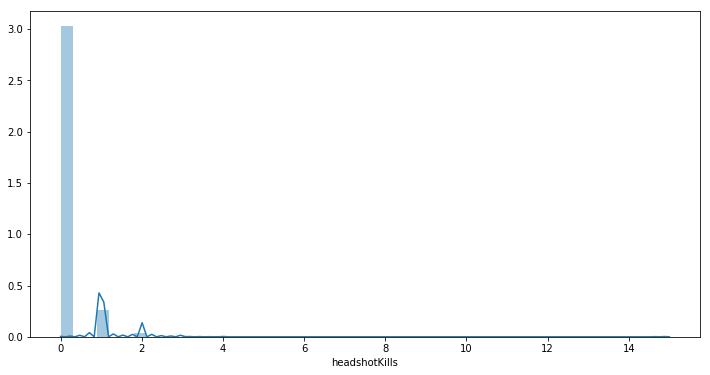

In [158]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(pd_hk['headshotKills'])
plt.show()

# TRY: kmeans

In [125]:
#kmeans1 = KMeans(n_clusters=8)

In [126]:
#kmeans1.fit(pd_hk[['headshotKills','kills']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
#pd.value_counts(kmeans1.labels_)

0    2529721
1     218433
2      29472
3       4628
5       1000
6        321
4         81
7         24
dtype: int64

In [128]:
#pd_hk[kmeans1.labels_==7].index

Int64Index([ 281570,  346124,  871244,  908815,  963463, 1079403, 1167959,
            1348164, 1380385, 1483199, 1581850, 1622232, 1753322, 2256755,
            2375749, 2647056, 2825200, 3288424, 3594399, 3926325, 4036281,
            4351048, 4387092, 4428741],
           dtype='int64')

In [69]:
c2 = (dat2['headshotKills'] == dat2['kills']) & (dat2['kills']>=10)    #枪枪爆头杀大于10人

In [123]:
dat2[c2].index

Int64Index([ 281570,  346124,  871244,  908815,  963463, 1079403, 1167959,
            1348164, 1380385, 1483199, 1581850, 1622232, 1753322, 2256755,
            2375749, 2647056, 2825200, 3288424, 3594399, 3926325, 4036281,
            4351048, 4387092, 4428741],
           dtype='int64')

In [71]:
dat3 = dat2.drop(dat2[c2].index)

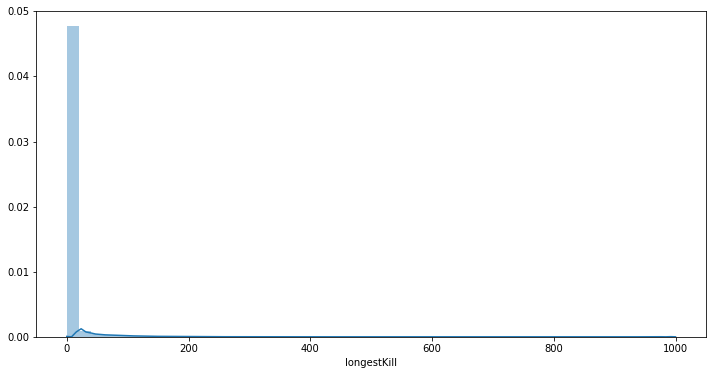

In [159]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(pd_hk['longestKill'])
plt.show()

In [72]:
c3 = dat3['longestKill']>=1000   # 1000米外杀人

In [161]:
dat3[c3].index

Int64Index([ 202281,  240005,  324313,  656553,  803632,  895411, 1172437,
            1209416, 1642712, 2015559, 2122128, 2152425, 2592718, 2981715,
            3081503, 3255171, 3304284, 3320960, 3552532, 4332473],
           dtype='int64')

In [162]:
dat4 = dat3.drop(dat3[c3].index)

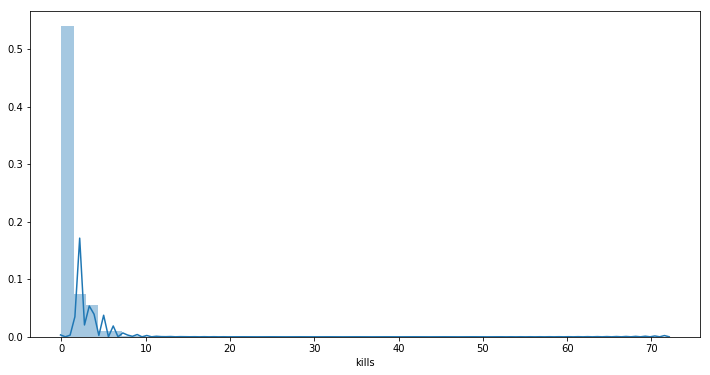

In [163]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(dat4['kills'])
plt.show()

In [164]:
c4 = dat4['kills']>=50   #单局杀超过50人

In [165]:
dat4[c4].index

Int64Index([ 334400,  672993,  770454,  797111, 1248348, 1454065, 1462706,
            1491277, 2020831, 2601666, 2929506, 3431247, 3673965, 4273754],
           dtype='int64')

In [166]:
dat5 = dat4.drop(dat4[c4].index)

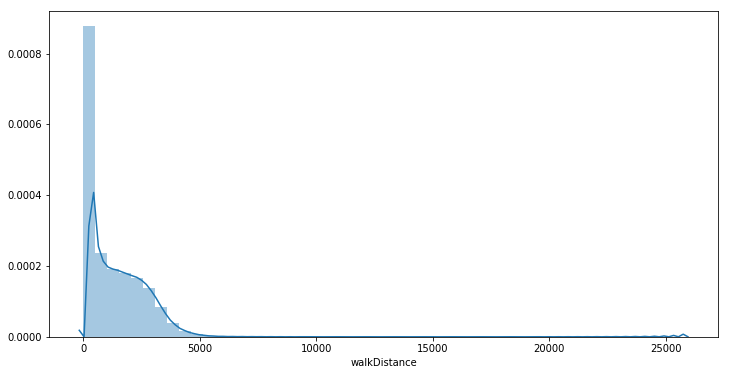

In [167]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(dat5['walkDistance'])
plt.show()

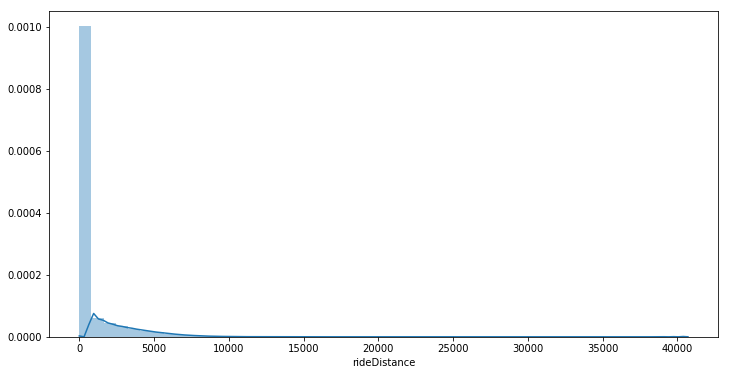

In [168]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(dat5['rideDistance'])
plt.show()

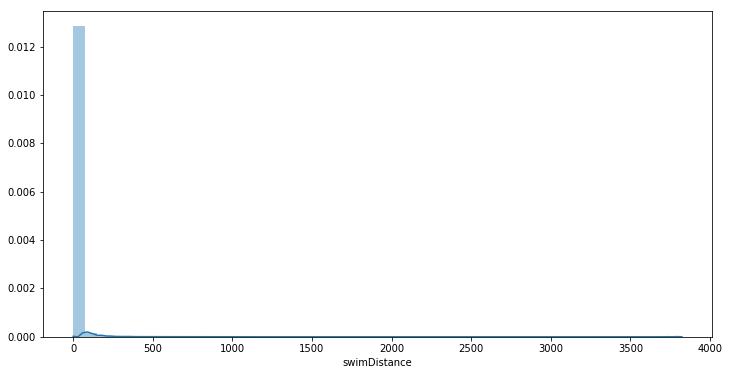

In [169]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(dat5['swimDistance'])
plt.show()

In [170]:
c5 = (dat5['rideDistance']>=20000) | (dat5['walkDistance']>=15000) | (dat5['swimDistance']>=1500)

In [171]:
dat5[c5].index

Int64Index([  28588,   63015,   70507,   72763,   95276,  140097,  177973,
             274258,  297186,  371098,
            ...
            4190290, 4191491, 4239725, 4248221, 4256764, 4270943, 4301013,
            4386384, 4404738, 4440261],
           dtype='int64', length=181)

In [172]:
dat6 = dat5.drop(dat5[c5].index)

In [173]:
dat6.shape

(4445191, 29)

In [176]:
#dat6.to_csv('./PUBG/data_final.csv')

# (3). Classification

In [181]:
dat_final = pd.read_csv('./data_final.csv')

In [183]:
dat_final.shape

(4445191, 30)

In [185]:
dat_final.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [187]:
dat_final.drop(dat_final.columns[0],axis=1,inplace=True)

In [188]:
dat_final.shape

(4445191, 29)

In [197]:
pd.unique(dat_final['matchType'])

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [199]:
solo_condition = np.array(['normal-solo', 'normal-solo-fpp', 'solo-fpp', 'solo'])

array(['normal-solo', 'normal-solo-fpp', 'solo-fpp', 'solo'], dtype='<U15')

In [212]:
solodata = dat_final.iloc[[i for i in range(dat_final.shape[0]) if dat_final.matchType[i] in solo_condition]]

In [213]:
solodata.shape

(720206, 29)

In [214]:
solodata.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [217]:
np.unique(solodata['numGroups'])

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,
        29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  44,
        46,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100])

In [218]:
pd.value_counts(solodata['teamKills'])

0    711963
1      8236
2         4
5         1
4         1
3         1
Name: teamKills, dtype: int64

In [247]:
pd.value_counts(solodata['revives'])

0    720206
Name: revives, dtype: int64

In [248]:
rm_feature = ['Id', 'groupId', 'matchId', 'DBNOs', 'matchType', 'numGroups', 'teamKills', 'revives']
len(rm_feature)
# 删了 'Id', 'groupId', 'matchId', 'DBNOs'(solo)'', 'matchType', 'numGroups', 'teamKills'.

8

In [249]:
solodata_final = solodata.drop(rm_feature, axis=1)
solodata_final.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,45,0,1,1,58.53,1424,97,1560,0.0,0,0.00,0,49.75,2,0,0.1875
7,0,0,8.538,0,0,48,1000,0,0,0.00,1967,96,-1,2004.0,0,0.00,0,1089.00,6,1500,0.7368
13,0,1,324.200,1,5,5,986,4,1,49.83,1886,97,-1,1228.0,0,76.84,0,2050.00,6,1462,0.8750
17,0,3,254.300,0,12,13,0,2,1,36.00,1371,96,1536,2367.0,0,15.29,0,1787.00,3,0,0.8211
35,0,0,136.900,0,0,37,0,1,1,22.83,1425,96,1500,0.0,0,0.00,0,270.70,1,0,0.3474


In [250]:
solodata_final.shape

(720206, 21)

In [253]:
#solodata_final.to_csv('./solo_data_final.csv')

# 2. input the solo_data

In [2]:
solo = pd.read_csv('./data/train/solo_data_final.csv')

In [3]:
solo.head()

,Unnamed: 0,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4,0,0,100.000,0,0,45,0,1,1,58.53,1424,97,1560,0.0,0,0.00,0,49.75,2,0,0.1875
1,7,0,0,8.538,0,0,48,1000,0,0,0.00,1967,96,-1,2004.0,0,0.00,0,1089.00,6,1500,0.7368
2,13,0,1,324.200,1,5,5,986,4,1,49.83,1886,97,-1,1228.0,0,76.84,0,2050.00,6,1462,0.8750
3,17,0,3,254.300,0,12,13,0,2,1,36.00,1371,96,1536,2367.0,0,15.29,0,1787.00,3,0,0.8211
4,35,0,0,136.900,0,0,37,0,1,1,22.83,1425,96,1500,0.0,0,0.00,0,270.70,1,0,0.3474


In [4]:
solo.shape

(720206, 22)

In [5]:
solo.drop(solo.columns[0],axis=1,inplace=True)

In [6]:
solo.shape   # 72W samples, 20 features.

(720206, 21)

In [7]:
solo.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,100.000,0,0,45,0,1,1,58.53,1424,97,1560,0.0,0,0.00,0,49.75,2,0,0.1875
1,0,0,8.538,0,0,48,1000,0,0,0.00,1967,96,-1,2004.0,0,0.00,0,1089.00,6,1500,0.7368
2,0,1,324.200,1,5,5,986,4,1,49.83,1886,97,-1,1228.0,0,76.84,0,2050.00,6,1462,0.8750
3,0,3,254.300,0,12,13,0,2,1,36.00,1371,96,1536,2367.0,0,15.29,0,1787.00,3,0,0.8211
4,0,0,136.900,0,0,37,0,1,1,22.83,1425,96,1500,0.0,0,0.00,0,270.70,1,0,0.3474


In [8]:
solo.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'rankPoints', 'rideDistance', 'roadKills',
       'swimDistance', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

# Correlation & Heat map

In [9]:
corr = solo.corr()
corr

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.127151,0.317250,0.163639,0.092871,-0.127608,0.026765,0.257575,0.133142,0.134148,-0.025409,-0.090752,-0.020935,0.053652,0.009075,0.013175,0.024428,0.107528,0.225942,0.023644,0.121995
boosts,0.127151,1.000000,0.557317,0.399888,0.501001,-0.565910,0.012639,0.558899,0.409111,0.455136,0.046917,0.032663,0.020009,0.297335,0.054746,0.116358,0.075910,0.640681,0.383269,-0.001372,0.637657
damageDealt,0.317250,0.557317,1.000000,0.674050,0.320707,-0.698107,0.038778,0.947361,0.680776,0.615736,-0.017886,-0.057551,0.002025,0.145453,0.077769,0.043424,0.073722,0.431012,0.399176,0.010891,0.486373
headshotKills,0.163639,0.399888,0.674050,1.000000,0.215379,-0.471829,0.021107,0.706370,0.479361,0.518793,-0.019313,-0.015145,0.004783,0.102136,0.024137,0.036599,0.044225,0.316650,0.263689,0.003297,0.340518
heals,0.092871,0.501001,0.320707,0.215379,1.000000,-0.360601,0.001563,0.315803,0.258067,0.247419,0.082673,0.013531,0.015267,0.232431,0.038494,0.086096,0.052210,0.408585,0.268044,-0.004635,0.401479
killPlace,-0.127608,-0.565910,-0.698107,-0.471829,-0.360601,1.000000,-0.012610,-0.707705,-0.799306,-0.548750,-0.004592,0.180715,-0.021857,-0.229550,-0.068451,-0.098876,-0.058470,-0.605418,-0.535173,0.005385,-0.758328
killPoints,0.026765,0.012639,0.038778,0.021107,0.001563,-0.012610,1.000000,0.036751,0.036907,0.016632,-0.073591,0.075545,-0.977486,-0.004574,0.005648,-0.002737,-0.007525,0.010646,0.002651,0.984765,0.023764
kills,0.257575,0.558899,0.947361,0.706370,0.315803,-0.707705,0.036751,1.000000,0.720475,0.637182,-0.035041,-0.020813,0.001577,0.136597,0.082065,0.047692,0.070258,0.429297,0.393739,0.010376,0.481300
killStreaks,0.133142,0.409111,0.680776,0.479361,0.258067,-0.799306,0.036907,0.720475,1.000000,0.507850,-0.044453,0.042189,-0.002356,0.110263,0.103105,0.042058,0.040593,0.353541,0.321232,0.012598,0.448532
longestKill,0.134148,0.455136,0.615736,0.518793,0.247419,-0.548750,0.016632,0.637182,0.507850,1.000000,0.053814,0.016155,0.012151,0.189750,0.034127,0.060080,0.071729,0.442324,0.292439,-0.000506,0.438626


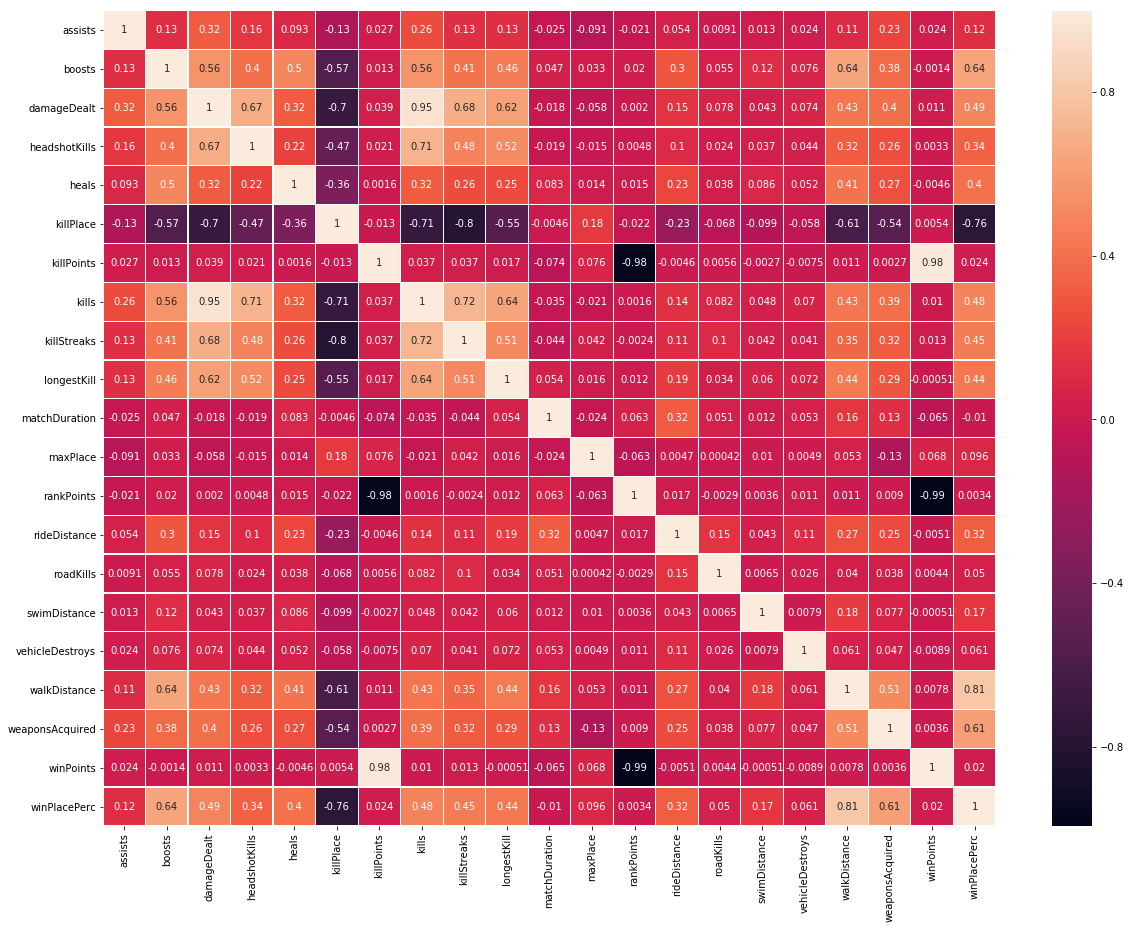

In [23]:
f, ax = plt.subplots(figsize=(20, 15))
heatmap = sns.heatmap(corr,annot=True, linewidths=0.3)

# 3. Model Selection & Feature Selection

In [7]:
y = np.array(solo["winPlacePerc"])
X = np.array(solo.drop("winPlacePerc",axis=1))
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                               test_size=0.3,
                                               random_state=123)

# (1). KNN

In [94]:
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_knn = {'kneighborsregressor__n_neighbors': range(6,13,2)}
gs_knn = GridSearchCV(pipe, param_knn,cv=5)
gs_knn.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_knn.best_score_*100))
print(gs_knn.best_params_)

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 12))
pipe.fit(X_train , y_train)
print("The accuracy on validation set is : %0.2f%%"  % (pipe.score(X_test , y_test)))    # R^2
print("The mse on validation set is : %0.4f"  % mean_squared_error(y_test , pipe.predict(X_test)))  # MSE

# (2). RF

In [15]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
forest = RandomForestRegressor(max_depth=10, random_state = 123)
param_forest = { "n_estimators" : range(30 , 40 , 3),
                "min_samples_split" : range(8 , 11 , 2)}
gs_forest = GridSearchCV(forest,param_forest,cv=5)
gs_forest.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print(gs_forest.best_params_)

Best Accuracy: 94.19%
{'min_samples_split': 10, 'n_estimators': 39}


In [20]:
forest = RandomForestRegressor(max_depth=15, random_state = 123, n_estimators=48)
param_forest = {"min_samples_split" : range(2, 9 , 2)}
gs_forest = GridSearchCV(forest,param_forest,cv = 3)
gs_forest.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print(gs_forest.best_params_)

{'min_samples_split': 10, 'n_estimators': 39}

In [ ]:
forest = RandomForestRegressor(max_depth=15, random_state = 123, n_estimators=48)
param_forest = { "min_samples_split" : range(8,13,2)}
gs_forest = GridSearchCV(forest,param_forest,cv = 3)
gs_forest.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print(gs_forest.best_params_)

In [37]:
forest = RandomForestRegressor(max_depth=15,  min_samples_split = 10 , n_estimators = 48)
forest.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
print("The score on validation set is : %0.4f"  % forest.score(X_test , y_test) )
print("The mse on validation set is : %0.6f"  % mean_squared_error(y_test , forest.predict(X_test)))

The score on validation set is : 0.9535
The mse on validation set is : 0.004139


In [60]:
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)

In [66]:
imp_vals = imp_vals / np.sum(imp_vals)
imp_vals

array([ 8.74846713e-05,  4.05452231e-03,  1.98975445e-03,  5.09996536e-05,
        3.29269943e-04,  5.60242041e-01,  1.58966248e-04,  3.86481854e-02,
        1.70448690e-02,  5.56299849e-04,  2.02687259e-02,  3.36673223e-02,
        3.04504799e-04,  2.11143783e-03, -9.39193214e-08,  8.71057134e-05,
        4.50906355e-07,  3.18412547e-01,  1.02468301e-03,  9.60923839e-04])

In [67]:
indices = np.argsort(imp_vals)[::-1]
indices

array([ 5, 17,  7, 11, 10,  8,  1, 13,  2, 18, 19,  9,  4, 12,  6,  0, 15,
        3, 16, 14])

In [68]:
solo.columns[indices]

Index(['killPlace', 'walkDistance', 'kills', 'maxPlace', 'matchDuration',
       'killStreaks', 'boosts', 'rideDistance', 'damageDealt',
       'weaponsAcquired', 'winPoints', 'longestKill', 'heals', 'rankPoints',
       'killPoints', 'assists', 'swimDistance', 'headshotKills',
       'vehicleDestroys', 'roadKills'],
      dtype='object')

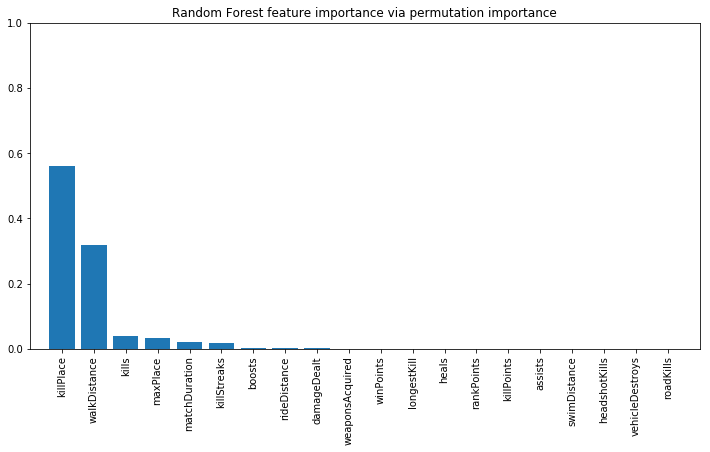

In [69]:
f, ax= plt.subplots(figsize = (12,6))
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]),solo.columns[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 1])
plt.show()

In [91]:
forest_df = pd.DataFrame(columns=['col','importance','rank'], index=solo.columns[indices])
forest_df['rank'] = range(1,21)
forest_df['col'] = indices
forest_df['importance'] = list(map(lambda x: format(x, '.2%'), imp_vals[indices]))
forest_df

,col,importance,rank
killPlace,5,56.02%,1
walkDistance,17,31.84%,2
kills,7,3.86%,3
maxPlace,11,3.37%,4
matchDuration,10,2.03%,5
killStreaks,8,1.70%,6
boosts,1,0.41%,7
rideDistance,13,0.21%,8
damageDealt,2,0.20%,9
weaponsAcquired,18,0.10%,10


# (3). GBDT

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [31]:
gbtree = GradientBoostingRegressor()
param_gbtree = { "max_depth" : range(3,6)}
gs_gbtree = GridSearchCV(gbtree, param_gbtree, cv=5)
gs_gbtree.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_gbtree.best_score_*100))
print(gs_gbtree.best_params_)

Best Accuracy: 95.17%
{'max_depth': 5}


In [37]:
gbtree = GradientBoostingRegressor(max_depth=5, min_samples_split = 600)
param_gbtree = { "n_estimators" : range(100,201,50) }
gs_gbtree = GridSearchCV(gbtree, param_gbtree, cv=3)
gs_gbtree.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_gbtree.best_score_*100))
print(gs_gbtree.best_params_)

Best Accuracy: 95.59%
{'n_estimators': 250}


In [24]:
gbtree = GradientBoostingRegressor(max_depth=5, min_samples_split = 600, n_estimators=250)
gbtree.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=600, min_weight_fraction_leaf=0.0,
             n_estimators=250, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
print("The score on validation set is : %0.4f"  % gbtree.score(X_test , y_test) )
print("The mse on validation set is : %0.6f"  % mean_squared_error(y_test , gbtree.predict(X_test)))

The score on validation set is : 0.9560
The mse on validation set is : 0.003914


In [26]:
imp_vals, _ = feature_importance_permutation(
    predict_method=gbtree.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)
imp_vals = imp_vals / np.sum(imp_vals)
indices = np.argsort(imp_vals)[::-1]

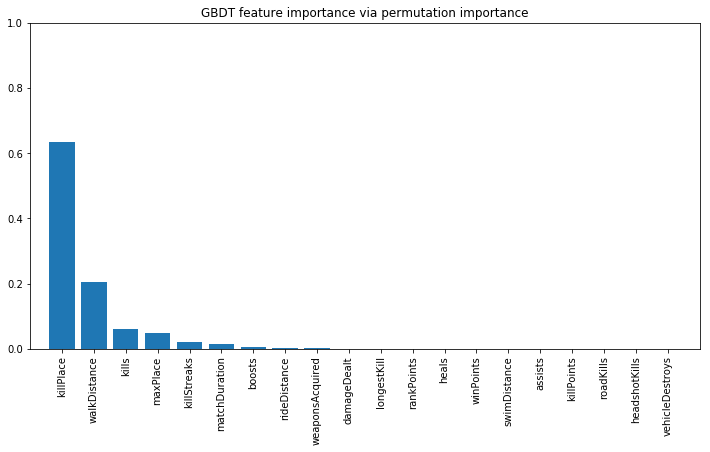

In [27]:
f, ax= plt.subplots(figsize = (12,6))
plt.title("GBDT feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]),solo.columns[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 1])
plt.show()

In [28]:
gbtree_df = pd.DataFrame(columns=['col','importance','rank'], index=solo.columns[indices])
gbtree_df['rank'] = range(1,21)
gbtree_df['col'] = indices
gbtree_df['importance'] = list(map(lambda x: format(x, '.2%'), imp_vals[indices]))
gbtree_df

,col,importance,rank
killPlace,5,63.37%,1
walkDistance,17,20.67%,2
kills,7,6.00%,3
maxPlace,11,4.93%,4
killStreaks,8,2.21%,5
matchDuration,10,1.64%,6
boosts,1,0.47%,7
rideDistance,13,0.21%,8
weaponsAcquired,18,0.15%,9
damageDealt,2,0.07%,10


# (4). XGboost

In [30]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [10]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
xgb = XGBRegressor()
param_xgb = { "learning_rate" : np.arange(0.1,0.21,0.05), 
                      'n_estimators' : range(100,201,50),
                       'max_depth' : [3,4,5]}
gs_xgb = GridSearchCV(xgb, param_xgb, cv=3)
gs_xgb.fit(X_train,y_train)
print('Best Accuracy: %.2f%%' % (gs_xgb.best_score_*100))
print(gs_xgb.best_params_)

Best Accuracy: 95.68%
{'learning_rate': 0.20000000000000004, 'max_depth': 5, 'n_estimators': 200}


In [73]:
xgb = XGBRegressor(learning_rate=0.2, max_depth= 5, n_estimators= 200)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
print("The score on validation set is : %0.4f"  % xgb.score(X_test , y_test) )
print("The mse on validation set is : %0.6f"  % mean_squared_error(y_test , xgb.predict(X_test)))

The score on validation set is : 0.9570
The mse on validation set is : 0.003825


In [75]:
imp_vals, _ = feature_importance_permutation(
    predict_method=xgb.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)
imp_vals = imp_vals / np.sum(imp_vals)
indices = np.argsort(imp_vals)[::-1]

In [76]:
indices

array([ 5,  7, 17, 11, 10,  1, 13, 18,  2,  9, 19, 12,  4,  6,  8, 15,  0,
       14,  3, 16])

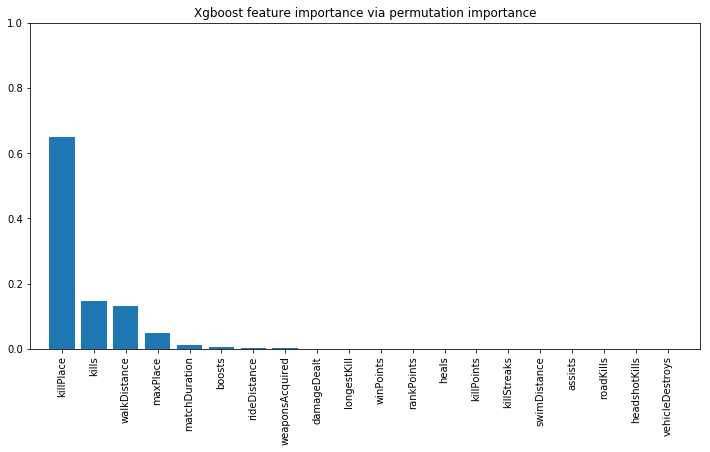

In [33]:
f, ax= plt.subplots(figsize = (12,6))
plt.title("Xgboost feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]),solo.columns[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 1])
plt.show()

In [34]:
xgb_df = pd.DataFrame(columns=['col','importance','rank'], index=solo.columns[indices])
xgb_df['rank'] = range(1,21)
xgb_df['col'] = indices
xgb_df['importance'] = list(map(lambda x: format(x, '.2%'), imp_vals[indices]))
xgb_df

,col,importance,rank
killPlace,5,65.13%,1
kills,7,14.62%,2
walkDistance,17,13.02%,3
maxPlace,11,4.73%,4
matchDuration,10,1.30%,5
boosts,1,0.48%,6
rideDistance,13,0.17%,7
weaponsAcquired,18,0.14%,8
damageDealt,2,0.12%,9
longestKill,9,0.07%,10


# (5). lightGBM

In [11]:
import lightgbm as lgb

In [63]:
lgb.LGBMRegressor()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
model_lgb = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8,learning_rate = 0.13)
param_lgb={ 'max_depth': range(7,12,2),
                   'num_leaves':range(90, 151, 30)}
gs_lgb = GridSearchCV(model_lgb, param_lgb,cv=3)

In [61]:
gs_lgb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.13, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n...=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(7, 12, 2), 'num_leaves': range(90, 151, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print('Best Accuracy: %.2f%%' % (gs_lgb.best_score_*100))
print(gs_lgb.best_params_)

Best Accuracy: 95.77%
{'max_depth': 11, 'num_leaves': 150}


In [64]:
model_lgb = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8,learning_rate = 0.13,
                             max_depth = 11, num_leaves = 150)
param_lgb={ 'reg_alpha': np.arange(0,0.4,0.1),
                   'reg_lambda':np.arange(0,0.4,0.1)}
gs_lgb = GridSearchCV(model_lgb, param_lgb,cv=3)

In [65]:
gs_lgb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.13, max_depth=11, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n...=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg_alpha': array([0. , 0.1, 0.2, 0.3]), 'reg_lambda': array([0. , 0.1, 0.2, 0.3])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print('Best Accuracy: %.2f%%' % (gs_lgb.best_score_*100))
print(gs_lgb.best_params_)

Best Accuracy: 95.78%
{'reg_alpha': 0.30000000000000004, 'reg_lambda': 0.30000000000000004}


In [67]:
lgb = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8,learning_rate = 0.13,
                             max_depth = 11, num_leaves = 150, reg_alpha = 0.3, reg_lambda = 0.3)
lgb.fit(X_train , y_train)

LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.13, max_depth=11, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=150, objective='regression',
       random_state=None, reg_alpha=0.3, reg_lambda=0.3, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
print("The score on validation set is : %0.4f"  % lgb.score(X_test , y_test) )
print("The mse on validation set is : %0.6f"  % mean_squared_error(y_test , lgb.predict(X_test)))

The score on validation set is : 0.9583
The mse on validation set is : 0.003713


In [77]:
imp_vals, _ = feature_importance_permutation(
    predict_method=lgb.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)
imp_vals = imp_vals / np.sum(imp_vals)
indices = np.argsort(imp_vals)[::-1]

In [78]:
indices

array([ 5, 17,  7, 11, 10,  8,  1, 13,  2, 18, 12,  9, 19,  4,  6,  0, 15,
        3, 14, 16])

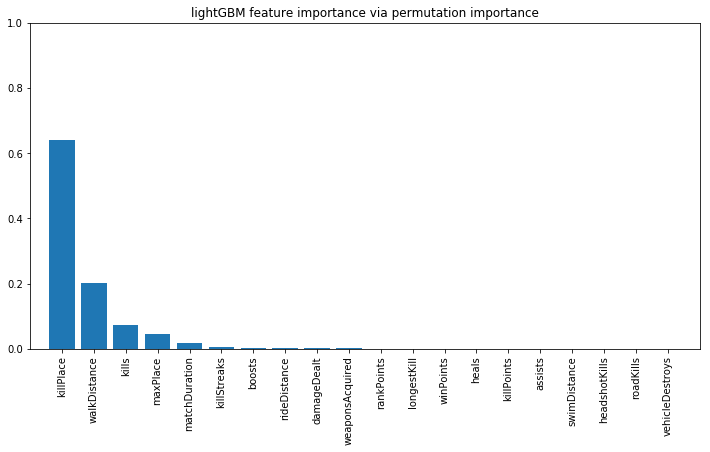

In [71]:
f, ax= plt.subplots(figsize = (12,6))
plt.title("lightGBM feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]),solo.columns[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 1])
plt.show()

In [72]:
lgb_df = pd.DataFrame(columns=['col','importance','rank'], index=solo.columns[indices])
lgb_df['rank'] = range(1,21)
lgb_df['col'] = indices
lgb_df['importance'] = list(map(lambda x: format(x, '.2%'), imp_vals[indices]))
lgb_df

,col,importance,rank
killPlace,5,64.08%,1
walkDistance,17,20.29%,2
kills,7,7.19%,3
maxPlace,11,4.63%,4
matchDuration,10,1.79%,5
killStreaks,8,0.74%,6
boosts,1,0.43%,7
rideDistance,13,0.20%,8
damageDealt,2,0.15%,9
weaponsAcquired,18,0.14%,10


# TRY: Remove 'killPlace'

In [79]:
solo.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'rankPoints', 'rideDistance', 'roadKills',
       'swimDistance', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

In [40]:
solo.shape

(720206, 21)

In [85]:
solo_change = solo.drop(['killPlace'],axis=1)

In [86]:
solo_change.shape

(720206, 20)

In [95]:
solo_change.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [87]:
y = np.array(solo_change["winPlacePerc"])
X = np.array(solo_change.drop("winPlacePerc",axis=1))
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                               test_size=0.3,
                                               random_state=123)

In [88]:
lgb.LGBMRegressor()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
model_lgb = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)
param_lgb={ 'max_depth': range(7,12,2),
                   'num_leaves':range(90, 151, 30),
                    'learning_rate': np.arange(0.01,0.2,0.03)}
gs_lgb = GridSearchCV(model_lgb, param_lgb,cv=3)

In [57]:
gs_lgb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.1, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_...=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(7, 12, 2), 'num_leaves': range(90, 151, 30), 'learning_rate': array([0.01, 0.04, 0.07, 0.1 , 0.13, 0.16, 0.19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('Best Accuracy: %.2f%%' % (gs_lgb.best_score_*100))
print(gs_lgb.best_params_)

Best Accuracy: 90.39%
{'learning_rate': 0.13, 'max_depth': 9, 'num_leaves': 150}


In [89]:
lgb_try = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8,learning_rate = 0.13,
                                                max_depth = 9, num_leaves = 150)
lgb_try.fit(X_train , y_train)

LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.13, max_depth=9, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=150, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [90]:
print("The score on validation set is : %0.4f"  % lgb_try.score(X_test , y_test) )
print("The mse on validation set is : %0.6f"  % mean_squared_error(y_test , lgb_try.predict(X_test)))

The score on validation set is : 0.9034
The mse on validation set is : 0.008603


In [102]:
solo_change.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

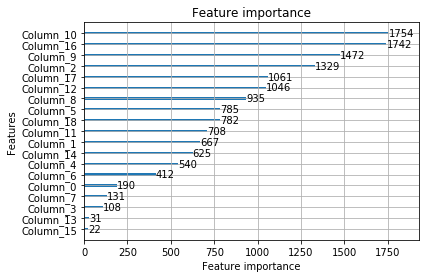

In [99]:
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_try)
plt.show()

In [96]:
imp_vals, _ = feature_importance_permutation(
    predict_method=lgb_try.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=5,
    seed=1)
imp_vals = imp_vals / np.sum(imp_vals)
indices = np.argsort(imp_vals)[::-1]

In [103]:
indices

array([16,  9, 12,  1, 17,  4,  2, 10, 14, 18,  8,  5,  6, 11,  0,  7,  3,
       13, 15])

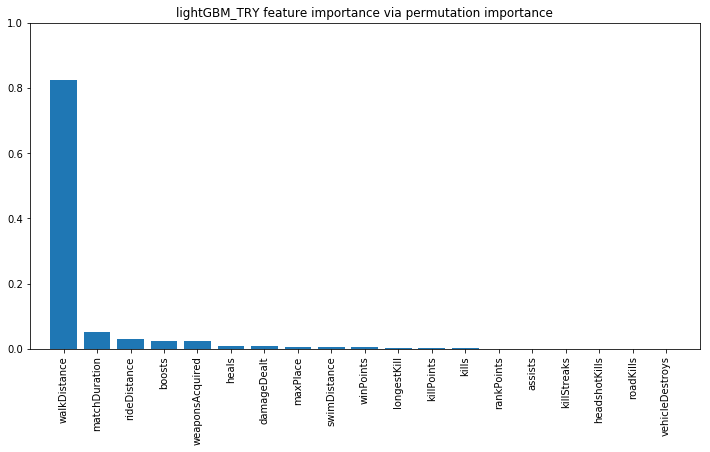

In [104]:
f, ax= plt.subplots(figsize = (12,6))
plt.title("lightGBM_TRY feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]),solo_change.columns[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 1])
plt.show()

In [106]:
lgb_try_df = pd.DataFrame(columns=['col','importance','rank'], index=solo_change.columns[indices])
lgb_try_df['rank'] = range(1,20)
lgb_try_df['col'] = indices
lgb_try_df['importance'] = list(map(lambda x: format(x, '.2%'), imp_vals[indices]))
lgb_try_df

,col,importance,rank
walkDistance,16,82.38%,1
matchDuration,9,5.26%,2
rideDistance,12,2.90%,3
boosts,1,2.53%,4
weaponsAcquired,17,2.30%,5
heals,4,1.01%,6
damageDealt,2,0.82%,7
maxPlace,10,0.63%,8
swimDistance,14,0.63%,9
winPoints,18,0.50%,10


# 4. Conclusion

In [69]:
model_eval = pd.DataFrame(columns=['R^2','MSE'], index=['KNN','RF','GBDT','Xgboost','LightGBM'])
model_eval.iloc[0] = [0.9249,0.0067]
model_eval.iloc[1] = [0.9535,0.0041]
model_eval.iloc[2] = [0.9560,0.0039]
model_eval.iloc[3] = [0.9570,0.0038]
model_eval.iloc[4] = [0.9583,0.0037]
model_eval

,R^2,MSE
KNN,0.9249,0.0067
RF,0.9535,0.0041
GBDT,0.956,0.0039
Xgboost,0.957,0.0038
LightGBM,0.9583,0.0037


In [11]:
import lightgbm as lgb

In [12]:
best_model = lgb.LGBMRegressor(objective='regression',metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8,learning_rate = 0.13,
                                                max_depth = 11, num_leaves = 150, reg_alpha = 0.3, reg_lambda = 0.3)
best_model.fit(X_train , y_train)

LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.13, max_depth=11, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=150, objective='regression',
       random_state=None, reg_alpha=0.3, reg_lambda=0.3, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 5. Import solo test data & predict

In [14]:
test_solo = pd.read_csv('./test_solo.csv')

In [15]:
test_solo.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,37ae98f31ca542,0,0,0.0,0,0,53,1075,0,0,0.000,1380,97,-1,0.0,0,4.894,0,0.00,0,1490
1,6425cf14b2d488,0,0,259.2,0,0,20,0,2,1,4.479,1880,97,1480,0.0,0,0.000,0,436.80,2,0
2,494d3d9fad73b2,0,0,0.0,0,0,87,0,0,0,0.000,1854,98,1499,0.0,0,0.000,0,82.11,2,0
3,e59dd1435a2ecf,0,0,100.0,0,1,32,0,1,1,25.230,1413,96,1488,0.0,0,0.000,0,571.70,5,0
4,3e4413d4780f7c,0,0,100.0,0,0,41,0,1,1,36.260,1389,95,1567,0.0,0,0.000,0,28.49,1,0


In [16]:
test_solo.shape

(313924, 21)

In [17]:
test_solo_y = best_model.predict(test_solo.drop(['Id'],axis=1))

In [18]:
len(test_solo_y[test_solo_y < 0])

901

In [19]:
test_solo_y[test_solo_y < 0] = 0

In [20]:
len(test_solo_y[test_solo_y > 1])

196

In [21]:
test_solo_y[test_solo_y > 1] = 1

In [22]:
len(test_solo_y[test_solo_y > 1])

0

In [23]:
len(test_solo_y[test_solo_y < 0])

0

In [24]:
test_solo_y[:5]

array([0.68214632, 0.3505412 , 0.11160152, 0.56770122, 0.14748944])

In [25]:
y_solo = pd.DataFrame(columns=['Id','winPlacePerc'])

In [26]:
y_solo['Id'] = test_solo['Id']

In [27]:
y_solo['winPlacePerc'] = test_solo_y

In [30]:
y_solo.head()

,Id,winPlacePerc
0,37ae98f31ca542,0.682146
1,6425cf14b2d488,0.350541
2,494d3d9fad73b2,0.111602
3,e59dd1435a2ecf,0.567701
4,3e4413d4780f7c,0.147489


In [31]:
#y_solo.to_csv('./predict_for_y/y_solo.csv',index=False)